In [1]:
import numpy as np
import math

class MLP(object):
    def __init__(self, numInput, numHidden1, numHidden2, numOutput):
        self.fitness = 0
        self.numInput = numInput + 1 # Add bias node from input to hidden layer␣ 􏰀→1 only
        self.numHidden1 = numHidden1 # Feel free to adapt the code to add more␣ 􏰀→biases if you wish
        self.numHidden2 = numHidden2
        self.numOutput = numOutput
        self.w_i_h1 = np.random.randn(self.numHidden1, self.numInput)
        self.w_h1_h2 = np.random.randn(self.numHidden2, self.numHidden1)
        self.w_h2_o = np.random.randn(self.numOutput, self.numHidden2)
        self.ReLU = lambda x : max(0,x)
    def sigmoid(self, x):
        try:
            ans = (1 / (1 + math.exp(-x)))
        except OverflowError:
            ans = float('inf')
        return ans

In [2]:
class MLP(MLP):
     def feedForward(self, inputs):
        inputsBias = inputs[:]
        inputsBias.insert(len(inputs), 1)
        h1 = np.dot(self.w_i_h1, inputsBias)
        h1 = [self.ReLU(x) for x in h1]
        h2 = np.dot(self.w_h1_h2, h1)
        h2 = [self.ReLU(x) for x in h2]
        output = np.dot(self.w_h2_o, h2)
        output = [self.sigmoid(x) for x in output]
        return output

In [3]:
class MLP(MLP):
    def getWeightsLinear(self):
        flat_w_i_h1 = list(self.w_i_h1.flatten())
        flat_w_h1_h2 = list(self.w_h1_h2.flatten())
        flat_w_h2_o = list(self.w_h2_o.flatten())
        return (flat_w_i_h1 + flat_w_h1_h2 + flat_w_h2_o)
    def setWeightsLinear(self, Wgenome):
        numWeights_I_H1 = self.numHidden1 * self.numInput
        numWeights_H1_H2 = self.numHidden2 * self.numHidden1
        numWeights_H2_O = self.numOutput * self.numHidden2
            
        self.w_i_h1 = np.array(Wgenome[:numWeights_I_H1])
        self.w_i_h1 = self.w_i_h1.reshape((self.numHidden1, self.numInput))
            
        self.w_h1_h2 = np.array(Wgenome[numWeights_I_H1:(numWeights_H1_H2+numWeights_I_H1)])
        self.w_h1_h2 = self.w_h1_h2.reshape((self.numHidden2, self.numHidden1))
            
        self.w_h2_o = np.array(Wgenome[(numWeights_H1_H2 + numWeights_I_H1):])
        self.w_h2_o = self.w_h2_o.reshape((self.numOutput, self.numHidden2))

In [4]:
# myNet = MLP(3, 3, 2, 1)

In [5]:
# a = myNet.getWeightsLinear()

In [6]:
# a

[0.4980335125841602,
 -1.191713905696434,
 -0.4760193973699821,
 0.4377776482622635,
 -0.35191118870357696,
 0.5234968182357583,
 -1.0756716937608308,
 -0.36245912579849454,
 0.12401193087143954,
 -0.8970686423199526,
 -0.017247563972798977,
 0.9505841193340466,
 0.26676337494696467,
 -0.7506431471426326,
 -0.3279244538548084,
 -0.8769174395438452,
 -0.916315218114545,
 0.7642833633370418,
 -1.2599815042752927,
 -0.8146726544209727]

In [7]:
# inputs = [0.5, 1.3, 0.1]

In [8]:
# outcome = myNet.feedForward(inputs)

In [9]:
# print(outcome)

[0.5]


In [10]:
# int(outcome[0] > 0.5)

0

In [11]:
import pygame

pygame 2.1.0 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [12]:
class FlappyBird:
    def __init__(self):
        self.screen = pygame.display.set_mode((400, 708))
        self.bird = pygame.Rect(65, 50, 50, 50)
        self.background = pygame.image.load("assets/background.png").convert()
        self.birdSprites = [pygame.image.load("assets/1.png").convert_alpha(),
                            pygame.image.load("assets/2.png").convert_alpha(),
                            pygame.image.load("assets/dead.png")]
        self.wallUp = pygame.image.load("assets/bottom.png").convert_alpha()
        self.wallDown = pygame.image.load("assets/top.png").convert_alpha() 
        self.gap = 130
        self.gravity = 5
        self.delay = False
        self.restart()
    
    def updateWalls(self): 
        self.wallx -= 5
        self.distanceMoved += 5 
        if self.wallx < -80: 
            self.wallx = 400
            self.counter += 1
            self.offset = np.random.randint(-180, 200)
            
    def birdUpdate(self): 
        if self.jump:
            self.jumpSpeed -= 1
            self.birdY -= self.jumpSpeed
            self.jump -= 1
        else:
            self.birdY += self.gravity 
            self.gravity += 0.2
        self.bird[1] = self.birdY
        upRect = pygame.Rect(self.wallx, 360 + self.gap - self.offset + 10,
                             self.wallUp.get_width() - 10,
                             self.wallUp.get_height())
        downRect = pygame.Rect(self.wallx,
                               0 - self.gap - self.offset - 10,
                               self.wallDown.get_width() - 10,
                               self.wallDown.get_height())
        if upRect.colliderect(self.bird): 
            self.dead = True
        if downRect.colliderect(self.bird): 
            self.dead = True
            
        if not 0 < self.bird[1] < 720: 
            self.dead = True
    def updateScreen(self):
        font = pygame.font.SysFont("Arial", 50)
        self.screen.fill((255, 255, 255)) 
        self.screen.blit(self.background, (0, 0))
        self.wallUpY = 360 + self.gap - self.offset
        self.wallDownY = 0 - self.gap - self.offset 
        self.screen.blit(self.wallUp, (self.wallx, self.wallUpY)) 
        self.screen.blit(self.wallDown, (self.wallx, self.wallDownY)) 
        self.screen.blit(font.render(str(self.counter),-1, (255, 255,255)), (200, 50))
        self.screen.blit(self.birdSprites[self.sprite], (70, self.birdY))
    def makeJump(self): 
        self.jump = 17
        self.gravity = 5
        self.jumpSpeed = 10
    def restart(self):
        self.wallx = 400
        self.wallUpY = 0
        self.wallDownY = 0
        self.birdY = 400
        self.jump = 0 # A timer for the jump self.jumpSpeed = 10
        self.dead = False
        self.sprite = 1
        self.distanceMoved = 0
        self.counter = 0
        self.stepsSinceLastJump = 0
        self.offset = np.random.randint(-180, 300)
        
    def run(self, network): 
        pygame.font.init()
        
        while self.dead == False:
            for event in pygame.event.get():
                if event.type == pygame.QUIT: 
                    sys.exit()
                if (event.type == pygame.KEYDOWN) and not self.dead:
                    if self.delay:
                        self.delay = False 
                    else:
                        self.delay = True 
                
            if self.delay: time.sleep(0.01)
            # We don't want it going on forever, so set an upper limit
            if self.counter == 10: 
                self.dead = True
        
            self.xdiff = 70 - self.wallx
            ydiffUp = self.birdY - self.wallUpY
            ydiffDown = self.birdY - self.wallDownY
            decision = network.feedForward([self.xdiff, ydiffUp, ydiffDown])
        
            if decision[0] > 0.5 and not self.dead: 
                self.makeJump()

            self.updateScreen() 
            self.updateWalls()
            self.birdUpdate()
        
            pygame.display.update() 
            
        return self.distanceMoved

In [13]:
from deap import base 
from deap import creator 
from deap import tools

import random
import time

In [14]:
numInputNodes = 3
numHiddenNodes1 = 3
numHiddenNodes2 = 2
numOutputNodes = 1
IND_SIZE = ((numInputNodes+1) * numHiddenNodes1) + (numHiddenNodes1 * numHiddenNodes2) + (numHiddenNodes2 * numOutputNodes)

In [15]:
myNet = MLP(numInputNodes, numHiddenNodes1, numHiddenNodes2, numOutputNodes)

In [16]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)

In [17]:
def evaluate(indiv, myNet, game):
    myNet.setWeightsLinear(indiv)
    game.restart()
    fitness = game.run(myNet) 
    return fitness,

In [18]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.5, indpb=0.1)

In [19]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [20]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values) 
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [21]:
logbook = tools.Logbook()
pop = toolbox.population(n=100)

In [22]:
game = FlappyBird()

In [23]:
fitnesses = [toolbox.evaluate(indiv, myNet, game) for indiv in pop] 
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [24]:
NGEN = 10

for g in range(NGEN):
    print("-- Generation %i --" % g) 
    
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))
    
    for mutant in offspring: 
        toolbox.mutate(mutant) 
        del mutant.fitness.values
        
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid] 
    fitnesses = [toolbox.evaluate(indiv, myNet, game) for indiv in invalid_ind] 
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit
            
    pop[:] = offspring
    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --


In [25]:
logbook.header = "gen", "avg", "evals", "std", "min", "max"

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
gen = logbook.select("gen") 
avgs = logbook.select("avg") 
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

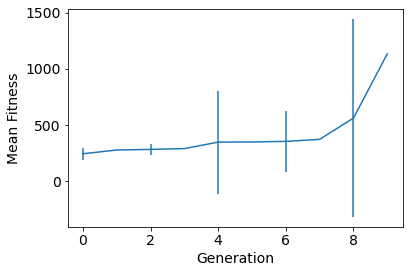

In [27]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2) 
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [28]:
indiv1 = tools.selBest(pop, 1)[0]
toolbox.evaluate(indiv1, myNet, game)

(4855,)